# Importing the data - Obtain step

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('kc_house_data.csv')
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

1. id - unique identified for a house
2. Date - house was sold
3. Price - is prediction target
4. bedroomsNumber - of Bedrooms/House
5. bathroomsNumber - of bathrooms/bedrooms
6. sqft_livingsquare - footage of the home
7. sqft_lotsquare - footage of the lot
8. floorsTotal - floors (levels) in house
9. waterfront - House which has a view to a waterfront
10. view - Has been viewed
11. condition - How good the condition is ( Overall )
12. grade - overall grade given to the housing unit, based on King County grading system
13. sqft_above - square footage of house apart from basement
14. sqft_basement - square footage of the basement
15. yr_built - Built Year
16. yr_renovated - Year when house was renovated
17. zipcode - zip
18. lat - Latitude coordinate
19. long - Longitude coordinate
20. sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
21. sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Scrubbing the data 

## Cleaning based on info

Key observations from here:

1. Datatype of date: String
2. Waterfront is missing values
3. Sqft_basement has a datatype of object
4. yr_renovbated missing values
5. yr_renovated is float

### Dealing with the date column

In [3]:
df.date.value_counts()

6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
            ... 
1/10/2015      1
5/15/2015      1
3/8/2015       1
11/2/2014      1
7/27/2014      1
Name: date, Length: 372, dtype: int64

By looking at the most common values in the Date column, we see that houses seem to sold more in late spring and early summer. Lets take another look at this and see if we can extract the month in any way.

<AxesSubplot:xlabel='date', ylabel='price'>

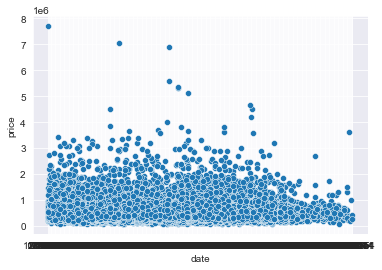

In [4]:
sns.scatterplot(x = "date", y = "price", data = df)

In [5]:
df['month'] = pd.to_datetime(df['date']).dt.month

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

<AxesSubplot:xlabel='month', ylabel='count'>

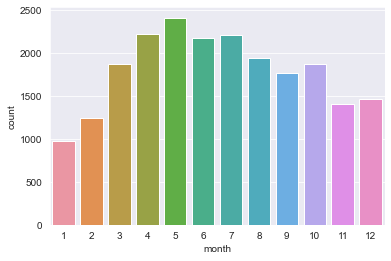

In [7]:
sns.countplot(x = "month", data = df)

So there appears to be certain months where more houses are sold. Lets take a look at the avg price of the homes during each month to see if there is any significant change by waiting to sell a house in the summer months.

<AxesSubplot:xlabel='month', ylabel='price'>

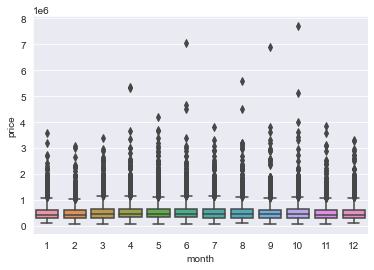

In [8]:
sns.boxplot(x = "month", y = "price", data = df)

<AxesSubplot:xlabel='month', ylabel='price'>

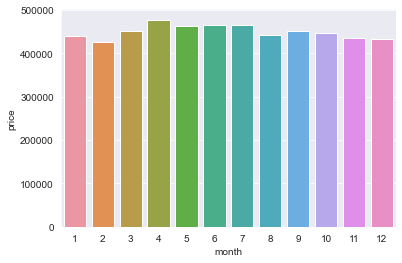

In [9]:
sns.barplot(x = "month", y = "price", data = df.groupby("month").median().reset_index())

In [10]:
df.groupby("month").median()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
month                                                                       
1      3.905036e+09  438500.0       3.0       2.25       1890.0    7800.0   
2      3.997500e+09  426500.0       3.0       2.00       1830.0    7667.0   
3      3.905040e+09  450000.0       3.0       2.25       1870.0    7560.0   
4      4.022900e+09  477000.0       3.0       2.25       1900.0    7500.0   
5      3.905005e+09  462000.0       3.0       2.25       1930.0    7498.0   
6      3.904925e+09  465000.0       3.0       2.25       1980.0    7700.0   
7      3.885801e+09  465000.0       3.0       2.25       1950.0    7695.0   
8      4.016800e+09  442200.0       3.0       2.25       1940.0    7810.0   
9      3.826501e+09  450000.0       3.0       2.25       1920.0    7620.0   
10     3.832180e+09  447000.0       3.0       2.25       1905.0    7413.0   
11     3.876312e+09  435000.0       3.0       2.00       1870.0    7500.0   
12     3.972001e+09  432500.0       3.0       2.25       1900.0    7725.0   

       floors  waterfront  view  condition  grade  sqft_above  yr_built  \
month                                                                     
1         1.0         0.0   0.0        3.0    7.0      1570.0    1974.0   
2         1.0         0.0   0.0        3.0    7.0      1489.0    1974.0   
3         1.0         0.0   0.0        3.0    7.0      1540.0    1973.0   
4         1.5         0.0   0.0        3.0    7.0      1540.0    1976.0   
5         1.0         0.0   0.0        3.0    7.0      1540.0    1974.0   
6         1.5         0.0   0.0        3.0    8.0      1600.0    1975.0   
7         1.5         0.0   0.0        3.0    8.0      1610.0    1977.0   
8         1.0         0.0   0.0        3.0    7.0      1590.0    1976.0   
9         1.5         0.0   0.0        3.0    7.0      1580.0    1974.0   
10        1.5         0.0   0.0        3.0    7.0      1560.0    1974.0   
11        1.5         0.0   0.0        3.0    7.0      1560.0    1973.0   
12        1.0         0.0   0.0        3.0    7.0      1545.0    1974.0   

       yr_renovated  zipcode       lat      long  sqft_living15  sqft_lot15  
month                                                                        
1               0.0  98065.0  47.55950 -122.2310         1800.0      7700.0  
2               0.0  98059.0  47.56120 -122.2290         1800.0      7638.0  
3               0.0  98065.0  47.56480 -122.2260         1820.0      7647.0  
4               0.0  98072.0  47.56860 -122.2290         1840.0      7560.0  
5               0.0  98072.0  47.57870 -122.2365         1840.0      7551.5  
6               0.0  98072.0  47.57605 -122.2290         1890.0      7720.0  
7               0.0  98059.0  47.57400 -122.2150         1870.0      7650.0  
8               0.0  98059.0  47.57720 -122.2220         1860.0      7755.0  
9               0.0  98065.0  47.57400 -122.2350         1830.0      7503.0  
10              0.0  98065.0  47.57525 -122.2460         1845.0      7457.0  
11              0.0  98072.0  47.57380 -122.2350         1800.0      7500.0  
12              0.0  98070.0  47.57865 -122.2425         1820.0      7680.0

Price of the same avg house changes by about $30k if you wait to see in the summer months. At this point it becomes clear that the month feature gives us a lot more information than the actual date. So we will be dropping date and just using the month from this point.

In [11]:
df.drop(columns=['date'], inplace=True, axis = 1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

### Dealing with missing values in waterfront

In [13]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [14]:
146/19200 * 100

0.7604166666666667

In [15]:
df.isna().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
month               0
dtype: int64

About 2300 values missing from waterfront, but we only have 146 houses with a waterfront. We need to explore whether we even need to include this variable. Lets check the avg prices of homes with a waterfront vs ones without a waterfront

<AxesSubplot:xlabel='waterfront', ylabel='price'>

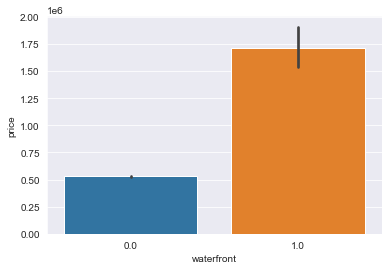

In [16]:
sns.barplot(x = "waterfront", y = "price", data = df)

<AxesSubplot:xlabel='long', ylabel='lat'>

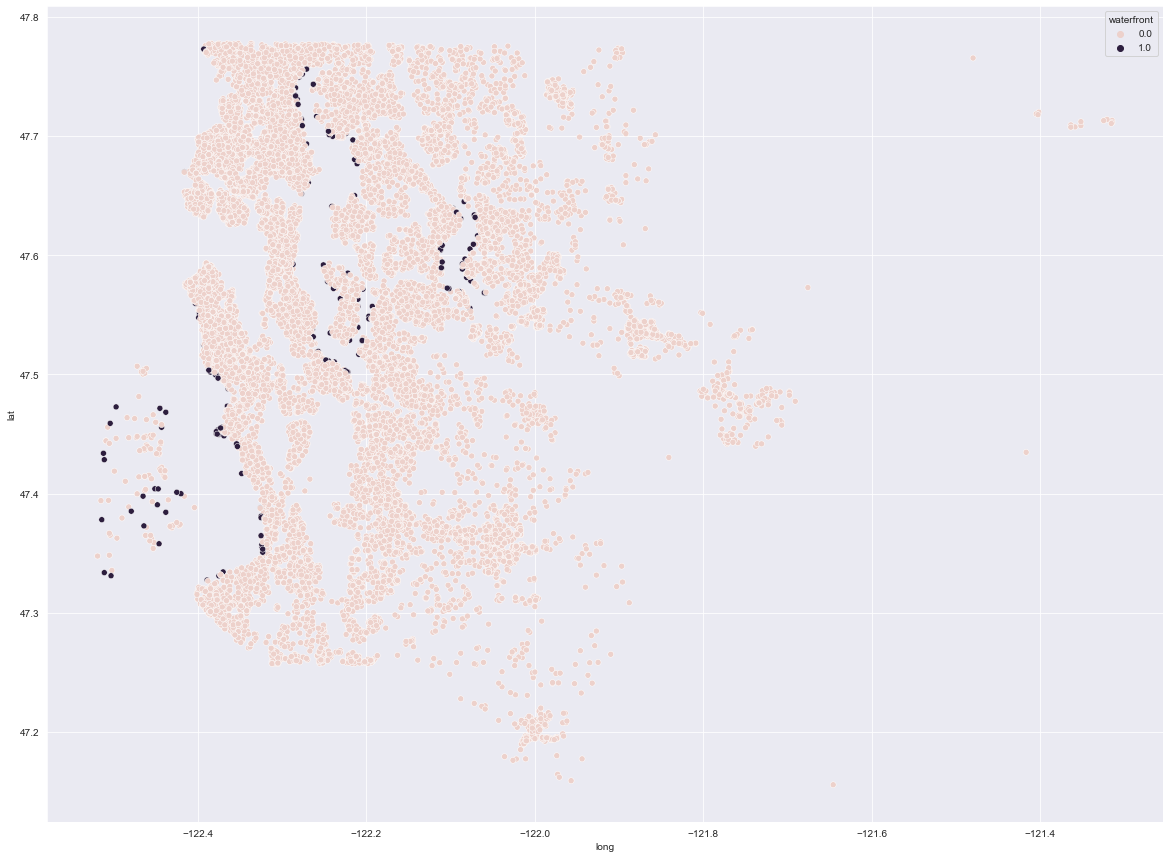

In [17]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = "long", y = "lat", hue = "waterfront",  data = df)

We are going to keep the waterfront variable and replicate the existing distribution to fill in the missing data. 

In [18]:
s = df.waterfront.value_counts(normalize=True)
df['waterfront_fillna'] = df['waterfront']
df.loc[df.waterfront.isna(), 'waterfront_fillna'] = np.random.choice(s.index, p=s.values, size=df.waterfront.isna().sum())

In [19]:
df['waterfront_fillna'].value_counts(normalize = True)

0.0    0.992406
1.0    0.007594
Name: waterfront_fillna, dtype: float64

Now that we replicated the existing distribution of waterfront, we can drop the original column and rename the new one accordingly.

In [20]:
df.drop(columns=['waterfront'], axis = 1, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21597 non-null  int64  
 1   price              21597 non-null  float64
 2   bedrooms           21597 non-null  int64  
 3   bathrooms          21597 non-null  float64
 4   sqft_living        21597 non-null  int64  
 5   sqft_lot           21597 non-null  int64  
 6   floors             21597 non-null  float64
 7   view               21534 non-null  float64
 8   condition          21597 non-null  int64  
 9   grade              21597 non-null  int64  
 10  sqft_above         21597 non-null  int64  
 11  sqft_basement      21597 non-null  object 
 12  yr_built           21597 non-null  int64  
 13  yr_renovated       17755 non-null  float64
 14  zipcode            21597 non-null  int64  
 15  lat                21597 non-null  float64
 16  long               215

In [22]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month', 'waterfront_fillna'],
      dtype='object')

In [23]:
df.columns = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month', 'waterfront']

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

### Dealing with sqft_basement

In [25]:
df.sqft_basement.value_counts(normalize = True)

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
861.0     0.000046
4820.0    0.000046
2490.0    0.000046
1548.0    0.000046
2580.0    0.000046
Name: sqft_basement, Length: 304, dtype: float64

Given that we see a "?" occuring that tells us why the datatype of this variable is a string. But we also notice that more than half the homes don't have a basement. We do have a few options about what to do in this situation.

1. Fill in the missing values with 0 as thats the median.
2. Convert this into a categorical column -> has_basement which is 1 if the house has a basement, 0 otherwise.
3. Drop the missing values.

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

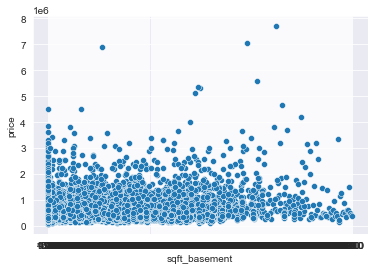

In [26]:
sns.scatterplot(x = "sqft_basement", y = "price", data = df)

In [27]:
df.sqft_basement.replace(to_replace= "?", value = np.nan, inplace = True)

In [28]:
df.sqft_basement.fillna(value = 0.0, inplace=True)

In [29]:
df.sqft_basement.value_counts(normalize = True)

0.0       0.593879
0.0       0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
2360.0    0.000046
266.0     0.000046
1990.0    0.000046
602.0     0.000046
2580.0    0.000046
Name: sqft_basement, Length: 304, dtype: float64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [31]:
df.sqft_basement = df.sqft_basement.astype(float)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

We went with option 1 where we decided to fill in all the ? values with a 0 as that was the median value.

### Lets deal with yr_renovated

In [33]:
df.yr_renovated.value_counts(normalize=True)

0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
            ...   
1946.0    0.000056
1959.0    0.000056
1971.0    0.000056
1951.0    0.000056
1954.0    0.000056
Name: yr_renovated, Length: 70, dtype: float64

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

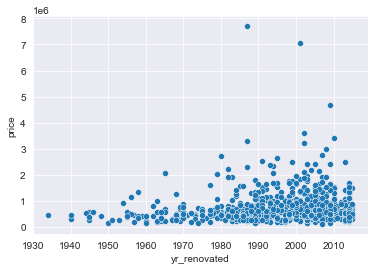

In [34]:
sns.scatterplot(x = "yr_renovated", y = "price", data = df[df['yr_renovated'] > 0])

Missing a lot of values here ~ 20%. Options include:

1. Filling missing values with just a zero (makes a lot more sense here as 96% of the homes have never been renovated)
2. Turn into a category of whether house has been renovated
3. Drop missing values.
4. Drop column
5. Turn into a category of whether house was renovated within the last 10 years

<AxesSubplot:xlabel='long', ylabel='lat'>

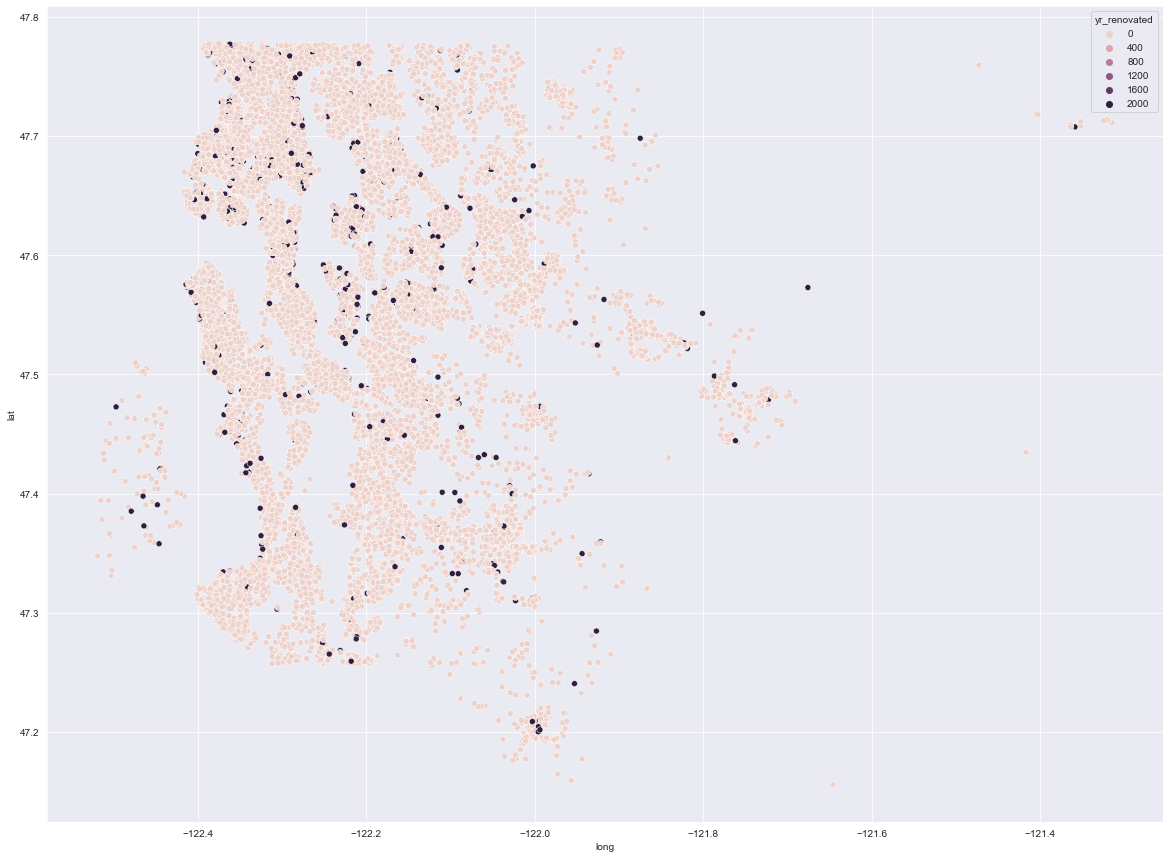

In [35]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = "long", y = "lat", hue = "yr_renovated",  data = df)

Looks like most of the renovated houses are close to the waterfront. This might mean their prices tend to be higher. Lets investigate a bit more

In [36]:
df.groupby("yr_renovated").count()

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
yr_renovated                                                             
0.0           17011  17011     17011      17011        17011     17011   
1934.0            1      1         1          1            1         1   
1940.0            2      2         2          2            2         2   
1944.0            1      1         1          1            1         1   
1945.0            3      3         3          3            3         3   
...             ...    ...       ...        ...          ...       ...   
2011.0            9      9         9          9            9         9   
2012.0            8      8         8          8            8         8   
2013.0           31     31        31         31           31        31   
2014.0           73     73        73         73           73        73   
2015.0           14     14        14         14           14        14   

              floors   view  condition  grade  sqft_above  sqft_basement  \
yr_renovated                                                               
0.0            17011  16961      17011  17011       17011          17011   
1934.0             1      1          1      1           1              1   
1940.0             2      2          2      2           2              2   
1944.0             1      1          1      1           1              1   
1945.0             3      3          3      3           3              3   
...              ...    ...        ...    ...         ...            ...   
2011.0             9      9          9      9           9              9   
2012.0             8      8          8      8           8              8   
2013.0            31     31         31     31          31             31   
2014.0            73     73         73     73          73             73   
2015.0            14     14         14     14          14             14   

              yr_built  zipcode    lat   long  sqft_living15  sqft_lot15  \
yr_renovated                                                               
0.0              17011    17011  17011  17011          17011       17011   
1934.0               1        1      1      1              1           1   
1940.0               2        2      2      2              2           2   
1944.0               1        1      1      1              1           1   
1945.0               3        3      3      3              3           3   
...                ...      ...    ...    ...            ...         ...   
2011.0               9        9      9      9              9           9   
2012.0               8        8      8      8              8           8   
2013.0              31       31     31     31             31          31   
2014.0              73       73     73     73             73          73   
2015.0              14       14     14     14             14          14   

              month  waterfront  
yr_renovated                     
0.0           17011       17011  
1934.0            1           1  
1940.0            2           2  
1944.0            1           1  
1945.0            3           3  
...             ...         ...  
2011.0            9           9  
2012.0            8           8  
2013.0           31          31  
2014.0           73          73  
2015.0           14          14  

[70 rows x 20 columns]

<AxesSubplot:xlabel='yr_renovated', ylabel='count'>

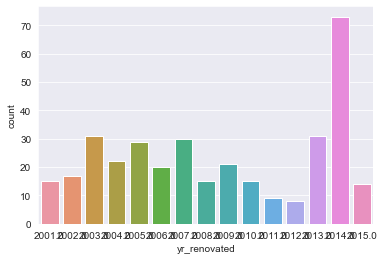

In [37]:
sns.countplot(x = "yr_renovated", data = df[df['yr_renovated'] > 2000])

In [38]:
yrs_since_reno = 2015 - df['yr_renovated']

In [39]:
yrs_since_reno.value_counts(normalize=True)

2015.0    0.958096
1.0       0.004112
2.0       0.001746
12.0      0.001746
8.0       0.001690
            ...   
62.0      0.000056
65.0      0.000056
39.0      0.000056
69.0      0.000056
71.0      0.000056
Name: yr_renovated, Length: 70, dtype: float64

In [40]:
df.yr_renovated.fillna(value= 0.0, inplace= True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

### Dropping all the other NA values

In [42]:
df.dropna(inplace=True)

### Dealing with duplicates

In [43]:
df.duplicated("id").sum()

177

Looks like some houses have been sold multiple times. Need to deal with these. Options:

1. Create a categorical col to indicate whether a house has been resold
2. Keep the most recent sale.
3. Make a subset to analyze change in the housing market.
4. Drop these observations

In [44]:
df.drop_duplicates("id", keep='last', inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21357 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21357 non-null  int64  
 1   price          21357 non-null  float64
 2   bedrooms       21357 non-null  int64  
 3   bathrooms      21357 non-null  float64
 4   sqft_living    21357 non-null  int64  
 5   sqft_lot       21357 non-null  int64  
 6   floors         21357 non-null  float64
 7   view           21357 non-null  float64
 8   condition      21357 non-null  int64  
 9   grade          21357 non-null  int64  
 10  sqft_above     21357 non-null  int64  
 11  sqft_basement  21357 non-null  float64
 12  yr_built       21357 non-null  int64  
 13  yr_renovated   21357 non-null  float64
 14  zipcode        21357 non-null  int64  
 15  lat            21357 non-null  float64
 16  long           21357 non-null  float64
 17  sqft_living15  21357 non-null  int64  
 18  sqft_l

### Dealing with multicollinearity

In [46]:
df.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.019088  0.000529   0.004146    -0.013599 -0.132802   
price         -0.019088  1.000000  0.308913   0.524350     0.700960  0.089247   
bedrooms       0.000529  0.308913  1.000000   0.515245     0.578790  0.032756   
bathrooms      0.004146  0.524350  0.515245   1.000000     0.755037  0.088328   
sqft_living   -0.013599  0.700960  0.578790   0.755037     1.000000  0.172899   
sqft_lot      -0.132802  0.089247  0.032756   0.088328     0.172899  1.000000   
floors         0.018100  0.255212  0.177177   0.501502     0.352438 -0.005775   
view           0.010925  0.395033  0.078523   0.185383     0.281658  0.075605   
condition     -0.024444  0.033540  0.025797  -0.129576    -0.062024 -0.008712   
grade          0.006605  0.667185  0.357521   0.665055     0.762092  0.114046   
sqft_above    -0.011968  0.604749  0.480005   0.685830     0.876640  0.183393   
sqft_basement -0.004818  0.319229  0.296406   0.277232     0.426750  0.014905   
yr_built       0.021160  0.051316  0.155031   0.506644     0.316707  0.052009   
yr_renovated  -0.010717  0.118408  0.017365   0.047463     0.050660  0.005104   
zipcode       -0.007747 -0.051373 -0.154961  -0.203526    -0.199029 -0.129684   
lat           -0.002974  0.307619 -0.011738   0.023346     0.050961 -0.085451   
long           0.019297  0.020194  0.132707   0.223928     0.240855  0.230175   
sqft_living15 -0.003895  0.583846  0.394417   0.568701     0.755991  0.144182   
sqft_lot15    -0.139482  0.082388  0.030834   0.088313     0.184296  0.716629   
month         -0.011913 -0.007672 -0.000682   0.009011     0.013707 -0.003494   
waterfront    -0.004978  0.242954 -0.005771   0.056170     0.095760  0.020168   

                 floors      view  condition     grade  ...  sqft_basement  \
id             0.018100  0.010925  -0.024444  0.006605  ...      -0.004818   
price          0.255212  0.395033   0.033540  0.667185  ...       0.319229   
bedrooms       0.177177  0.078523   0.025797  0.357521  ...       0.296406   
bathrooms      0.501502  0.185383  -0.129576  0.665055  ...       0.277232   
sqft_living    0.352438  0.281658  -0.062024  0.762092  ...       0.426750   
sqft_lot      -0.005775  0.075605  -0.008712  0.114046  ...       0.014905   
floors         1.000000  0.027193  -0.266929  0.457988  ...      -0.242634   
view           0.027193  1.000000   0.044790  0.248276  ...       0.271172   
condition     -0.266929  0.044790   1.000000 -0.150952  ...       0.168396   
grade          0.457988  0.248276  -0.150952  1.000000  ...       0.162871   
sqft_above     0.522122  0.165570  -0.161416  0.756126  ...      -0.052831   
sqft_basement -0.242634  0.271172   0.168396  0.162871  ...       1.000000   
yr_built       0.489153 -0.056290  -0.364943  0.446623  ...      -0.132058   
yr_renovated   0.002659  0.089965  -0.056187  0.015352  ...       0.066037   
zipcode       -0.057948  0.087559   0.003606 -0.183518  ...       0.073885   
lat            0.049078  0.005652  -0.016065  0.113024  ...       0.108456   
long           0.124190 -0.079216  -0.106752  0.199032  ...      -0.143008   
sqft_living15  0.278137  0.278188  -0.095362  0.712768  ...       0.197229   
sqft_lot15    -0.011497  0.073630  -0.003023  0.120510  ...       0.015933   
month          0.015313 -0.004208   0.023880  0.011530  ...       0.008111   
waterfront     0.019570  0.363445   0.014117  0.076265  ...       0.074078   

               yr_built  yr_renovated   zipcode       lat      long  \
id             0.021160     -0.010717 -0.007747 -0.002974  0.019297   
price          0.051316      0.118408 -0.051373  0.307619  0.020194   
bedrooms       0.155031      0.017365 -0.154961 -0.011738  0.132707   
bathrooms      0.506644      0.047463 -0.203526  0.023346  0.223928   
sqft_living    0.316707      0.050660 -0.199029  0.050961  0.240855   
sqft_lot       0.052009      0.005104 -0.129684 -0.085451  0.230175   
floors         0.489153 

<AxesSubplot:>

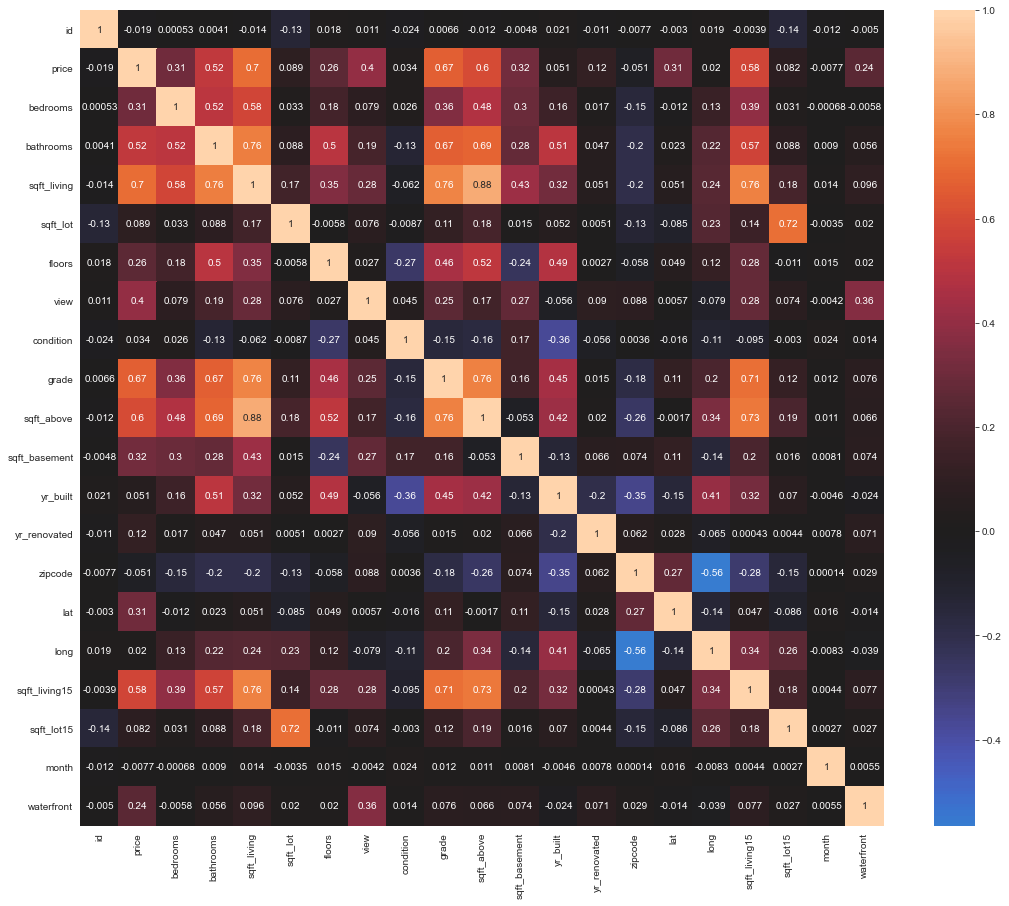

In [47]:
plt.figure(figsize=(18,15))
sns.heatmap(data = df.corr(), center= 0, annot= True)

In [48]:
df.drop(columns=["sqft_above"], inplace= True, axis = 1)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21357 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21357 non-null  int64  
 1   price          21357 non-null  float64
 2   bedrooms       21357 non-null  int64  
 3   bathrooms      21357 non-null  float64
 4   sqft_living    21357 non-null  int64  
 5   sqft_lot       21357 non-null  int64  
 6   floors         21357 non-null  float64
 7   view           21357 non-null  float64
 8   condition      21357 non-null  int64  
 9   grade          21357 non-null  int64  
 10  sqft_basement  21357 non-null  float64
 11  yr_built       21357 non-null  int64  
 12  yr_renovated   21357 non-null  float64
 13  zipcode        21357 non-null  int64  
 14  lat            21357 non-null  float64
 15  long           21357 non-null  float64
 16  sqft_living15  21357 non-null  int64  
 17  sqft_lot15     21357 non-null  int64  
 18  month 

# Exploring the data

In [50]:
#sns.pariplot(df)

In [51]:
#scatterplot of each independent variable vs price to make sure you have a 
#linear relationship and that the variable is actually relevant

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':

<Figure size 1800x1584 with 0 Axes>

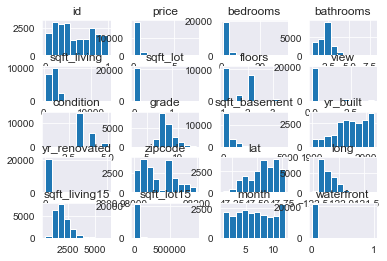

In [52]:
plt.figure(figsize=(25,22))
df.hist()

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

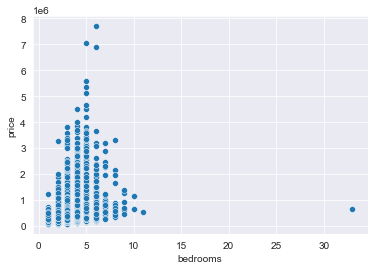

In [53]:
sns.scatterplot(x = "bedrooms", y = "price", data = df)

We seem to have a house with more than 30 bedrooms

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

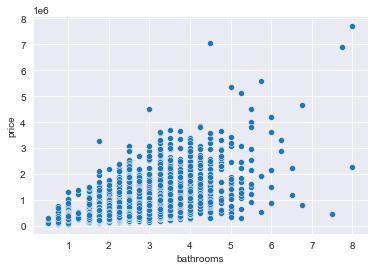

In [54]:
sns.scatterplot(x = "bathrooms", y = "price", data = df)

We seem to have a few houses that don't have 1 full bath

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

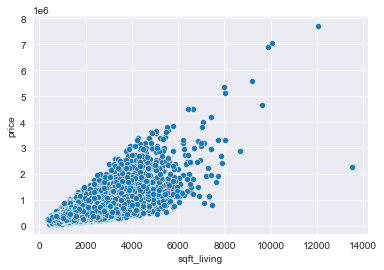

In [55]:
sns.scatterplot(x = "sqft_living", y = "price", data = df)

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

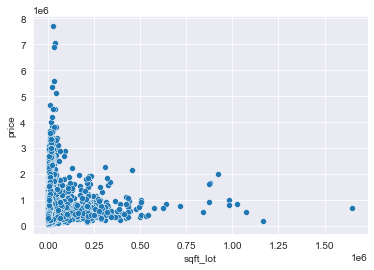

In [56]:
sns.scatterplot(x = "sqft_lot", y = "price", data = df)

<AxesSubplot:xlabel='grade', ylabel='price'>

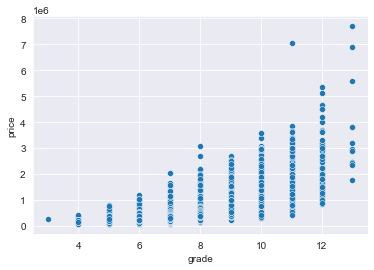

In [57]:
sns.scatterplot(x = "grade", y = "price", data = df)

<AxesSubplot:xlabel='yr_built', ylabel='price'>

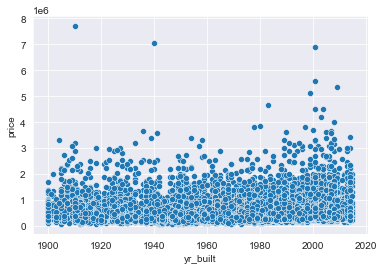

In [58]:
sns.scatterplot(x = "yr_built", y = "price", data = df)

In [141]:
df[df.bedrooms > 8]

id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
4092   1997200215   599999.0         9       4.50         3830      6988   
4231   2902200015   700000.0         9       3.00         3680      4400   
6073   9822700190  1280000.0         9       4.50         3650      5000   
8537    424049043   450000.0         9       7.50         4050      6504   
8748   1773100755   520000.0        11       3.00         3000      4960   
13301   627300145  1150000.0        10       5.25         4590     10920   
15147  5566100170   650000.0        10       2.00         3610     11914   
15856  2402100895   640000.0        33       1.75         1620      6000   
16830  8823900290  1400000.0         9       4.00         4620      5508   
18428  8823901445   934000.0         9       3.00         2820      4480   
19239  8812401450   660000.0        10       3.00         2920      3745   

       floors  view  condition  grade  sqft_basement  yr_built  yr_renovated  \
4092      2.5   0.0          3      7         1380.0      1938           0.0   
4231      2.0   0.0          3      7          850.0      1908           0.0   
6073      2.0   0.0          3      8         1120.0      1915        2010.0   
8537      2.0   0.0          3      7            0.0      1996           0.0   
8748      2.0   0.0          3      7          600.0      1918        1999.0   
13301     1.0   2.0          3      9         2090.0      2008           0.0   
15147     2.0   0.0          4      7          600.0      1958           0.0   
15856     1.0   0.0          5      7          580.0      1947           0.0   
16830     2.5   0.0          3     11          750.0      1915           0.0   
18428     2.0   0.0          3      7          940.0      1918           0.0   
19239     2.0   0.0          4      7         1060.0      1913           0.0   

       zipcode      lat     long  sqft_living15  sqft_lot15  month  waterfront  
4092     98103  47.6927 -122.338           1460        6291      5         0.0  
4231     98102  47.6374 -122.324           1960        2450      1         0.0  
6073     98105  47.6604 -122.289           2510        5000      8         0.0  
8537     98144  47.5923 -122.301           1448        3866      8         0.0  
8748     98106  47.5560 -122.363           1420        4960      8         0.0  
13301    98004  47.5861 -122.113           2730       10400      8         0.0  
15147    98006  47.5705 -122.175           2040       11914     10         0.0  
15856    98103  47.6878 -122.331           1330        4700      6         0.0  
16830    98105  47.6684 -122.309           2710        4320      3         0.0  
18428    98105  47.6654 -122.307           2460        4400      3         0.0  
19239    98105  47.6635 -122.320           1810        3745     12         0.0

# Modeling 
## baseline model

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21357 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21357 non-null  int64  
 1   price          21357 non-null  float64
 2   bedrooms       21357 non-null  int64  
 3   bathrooms      21357 non-null  float64
 4   sqft_living    21357 non-null  int64  
 5   sqft_lot       21357 non-null  int64  
 6   floors         21357 non-null  float64
 7   view           21357 non-null  float64
 8   condition      21357 non-null  int64  
 9   grade          21357 non-null  int64  
 10  sqft_basement  21357 non-null  float64
 11  yr_built       21357 non-null  int64  
 12  yr_renovated   21357 non-null  float64
 13  zipcode        21357 non-null  int64  
 14  lat            21357 non-null  float64
 15  long           21357 non-null  float64
 16  sqft_living15  21357 non-null  int64  
 17  sqft_lot15     21357 non-null  int64  
 18  month 

In [60]:
from statsmodels.formula.api import ols

In [61]:
outcome = 'price'
predictors = df.drop('price', axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [62]:
formula

'price~id+bedrooms+bathrooms+sqft_living+sqft_lot+floors+view+condition+grade+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15+month+waterfront'

In [63]:
baseline_model = ols(formula = formula, data = df).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     2594.
Date:                Wed, 26 May 2021   Prob (F-statistic):               0.00
Time:                        15:01:56   Log-Likelihood:            -2.9113e+05
No. Observations:               21357   AIC:                         5.823e+05
Df Residuals:                   21337   BIC:                         5.825e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.755e+06   2.95e+06      2.629      0.009    1.97e+06    1.35e+07
id            -1.464e-06   4.86e-07     -3.015      0.003   -2.42e-06   -5.12e-07
bedrooms      -3.622e+04   1915.392    -18.911      0.000      -4e+04   -3.25e+04
bathrooms      4.096e+04   3281.074     12.484      0.000    3.45e+04    4.74e+04
sqft_living     179.4022      3.676     48.805      0.000     172.197     186.607
sqft_lot          0.1119      0.048      2.326      0.020       0.018       0.206
floors         9056.1768   3595.174      2.519      0.012    2009.366    1.61e+04
view           5.772e+04   2118.600     27.245      0.000    5.36e+04    6.19e+04
condition      2.661e+04   2366.321     11.245      0.000     2.2e+04    3.12e+04
grade          9.719e+04   2173.529     44.715      0.000    9.29e+04    1.01e+05
sqft_basement   -27.8926      4.345     -6.419      0.000     -36.410     -19.375
yr_built      -2640.8682     72.384    -36.484      0.000   -2782.746   -2498.990
yr_renovated     24.5823      3.995      6.153      0.000      16.752      32.413
zipcode        -591.2301     33.224    -17.795      0.000    -656.351    -526.109
lat            6.027e+05   1.08e+04     55.807      0.000    5.82e+05    6.24e+05
long          -2.136e+05   1.32e+04    -16.128      0.000    -2.4e+05   -1.88e+05
sqft_living15    20.8281      3.462      6.015      0.000      14.041      27.615
sqft_lot15       -0.3924      0.074     -5.325      0.000      -0.537      -0.248
month         -2955.4987    442.660     -6.677      0.000   -3823.146   -2087.852
waterfront     5.122e+05   1.71e+04     30.033      0.000    4.79e+05    5.46e+05
==============================================================================
Omnibus:                    18130.874   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1825048.783
Skew:                           3.557   Prob(JB):                         0.00
Kurtosis:                      47.725   Cond. No.                     1.16e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Conclusions from baseline model:

1. Drop **id** as its not a relevant feature (even though it has a good p-value doesn't really tell us anything)
2. **Bedrooms** has a negative coefficient -> As bedrooms increase, price decreases. 
3. Price per sqft is about $180
4. **Sqft_Basement** has a negative coefficient
5. **Yr_Built** has a negative coefficient
6. **Zipcode** has a negative coefficent. need to look into how to get location data in the model

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [65]:
X = df.drop("price", axis = 1)
y = df['price']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [67]:
len(X_train)

16017

In [68]:
len(X_test)

5340

In [69]:
baseline_linreg = LinearRegression()

In [70]:
baseline_linreg.fit(X_train, y_train)

LinearRegression()

In [71]:
y_pred = baseline_linreg.predict(X_test)

In [72]:
residuals = y_pred - y_test

In [73]:
X.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'month', 'waterfront'],
      dtype='object')

In [74]:
baseline_linreg.coef_

array([-1.36764056e-06, -3.73535100e+04,  4.14214573e+04,  1.72268882e+02,
        2.07110870e-01,  7.19618239e+03,  5.40837302e+04,  2.51059892e+04,
        9.89461833e+04, -2.82047266e+01, -2.66462929e+03,  2.50801070e+01,
       -6.03331419e+02,  6.08222632e+05, -2.03444580e+05,  2.48622376e+01,
       -4.31362608e-01, -3.08986760e+03,  5.50241530e+05])

In [75]:
from sklearn.metrics import mean_squared_error

In [76]:
mse_train = mean_squared_error(y_train, baseline_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 198694.75361300103
Test RMSE: 209374.6589335814


In [77]:
import statsmodels.api as sm
import scipy.stats as stats

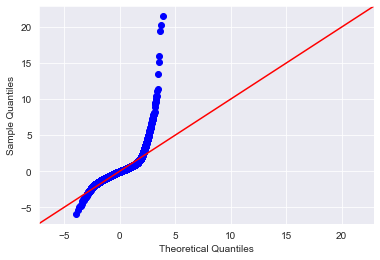

In [78]:
fig = sm.graphics.qqplot(baseline_model.resid, dist=stats.norm, line='45', fit=True)

In [79]:
df.price.mean()

541625.1545629068

## Model 2 -  Dealing with outliers

In [80]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.135700e+04  2.135700e+04  21357.000000  21357.000000  21357.000000   
mean   4.582834e+09  5.416252e+05      3.373788      2.118322   2082.642834   
std    2.876805e+09  3.662398e+05      0.925514      0.768334    918.147434   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.124049e+09  3.249500e+05      3.000000      1.750000   1430.000000   
50%    3.904940e+09  4.500000e+05      3.000000      2.250000   1920.000000   
75%    7.312000e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors          view     condition         grade  \
count  2.135700e+04  21357.000000  21357.000000  21357.000000  21357.000000   
mean   1.511924e+04      1.496020      0.234677      3.410685      7.662312   
std    4.149855e+04      0.540206      0.766459      0.650143      1.171407   
min    5.200000e+02      1.000000      0.000000      1.000000      3.000000   
25%    5.040000e+03      1.000000      0.000000      3.000000      7.000000   
50%    7.613000e+03      1.500000      0.000000      3.000000      7.000000   
75%    1.069600e+04      2.000000      0.000000      4.000000      8.000000   
max    1.651359e+06      3.500000      4.000000      5.000000     13.000000   

       sqft_basement      yr_built  yr_renovated       zipcode           lat  \
count   21357.000000  21357.000000  21357.000000  21357.000000  21357.000000   
mean      285.461488   1971.095894     69.066723  98077.861544     47.560285   
std       439.524222     29.387983    364.832709     53.470865      0.138566   
min         0.000000   1900.000000      0.000000  98001.000000     47.155900   
25%         0.000000   1952.000000      0.000000  98033.000000     47.471300   
50%         0.000000   1975.000000      0.000000  98065.000000     47.572200   
75%       550.000000   1997.000000      0.000000  98117.000000     47.678100   
max      4820.000000   2015.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15         month    waterfront  
count  21357.000000   21357.000000   21357.000000  21357.000000  21357.000000  
mean    -122.213749    1988.066255   12768.505876      6.565576      0.007632  
std        0.140802     685.428458   27326.770308      3.116528      0.087030  
min     -122.519000     399.000000     651.000000      1.000000      0.000000  
25%     -122.328000    1490.000000    5100.000000      4.000000      0.000000  
50%     -122.230000    1840.000000    7620.000000      6.000000      0.000000  
75%     -122.125000    2370.000000   10087.000000      9.000000      0.000000  
max     -121.315000    6210.000000  871200.000000     12.000000      1.000000

In [81]:
df_no_outliers = df[df.bathrooms >= 1]

In [82]:
df_no_outliers = df_no_outliers[df_no_outliers.price <= 1500000]

In [83]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20773 entries, 0 to 21595
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20773 non-null  int64  
 1   price          20773 non-null  float64
 2   bedrooms       20773 non-null  int64  
 3   bathrooms      20773 non-null  float64
 4   sqft_living    20773 non-null  int64  
 5   sqft_lot       20773 non-null  int64  
 6   floors         20773 non-null  float64
 7   view           20773 non-null  float64
 8   condition      20773 non-null  int64  
 9   grade          20773 non-null  int64  
 10  sqft_basement  20773 non-null  float64
 11  yr_built       20773 non-null  int64  
 12  yr_renovated   20773 non-null  float64
 13  zipcode        20773 non-null  int64  
 14  lat            20773 non-null  float64
 15  long           20773 non-null  float64
 16  sqft_living15  20773 non-null  int64  
 17  sqft_lot15     20773 non-null  int64  
 18  month 

In [84]:
df_no_outliers.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.077300e+04  2.077300e+04  20773.000000  20773.000000  20773.000000   
mean   4.596978e+09  5.036135e+05      3.358254      2.088877   2028.988254   
std    2.880172e+09  2.480298e+05      0.912340      0.727711    823.420528   
min    1.000102e+06  7.800000e+04      1.000000      1.000000    390.000000   
25%    2.126049e+09  3.200000e+05      3.000000      1.500000   1420.000000   
50%    3.905041e+09  4.480000e+05      3.000000      2.250000   1890.000000   
75%    7.335400e+09  6.250000e+05      4.000000      2.500000   2500.000000   
max    9.900000e+09  1.500000e+06     33.000000      7.500000   7480.000000   

           sqft_lot        floors          view     condition         grade  \
count  2.077300e+04  20773.000000  20773.000000  20773.000000  20773.000000   
mean   1.475522e+04      1.488543      0.199779      3.408174      7.604438   
std    4.008853e+04      0.538646      0.695191      0.647251      1.087777   
min    5.200000e+02      1.000000      0.000000      1.000000      4.000000   
25%    5.000000e+03      1.000000      0.000000      3.000000      7.000000   
50%    7.543000e+03      1.500000      0.000000      3.000000      7.000000   
75%    1.045400e+04      2.000000      0.000000      4.000000      8.000000   
max    1.651359e+06      3.500000      4.000000      5.000000     12.000000   

       sqft_basement      yr_built  yr_renovated       zipcode           lat  \
count   20773.000000  20773.000000  20773.000000  20773.000000  20773.000000   
mean      273.422953   1971.092620     64.758918  98078.252299     47.558946   
std       420.062972     29.272791    353.656551     53.347139      0.139726   
min         0.000000   1900.000000      0.000000  98001.000000     47.155900   
25%         0.000000   1952.000000      0.000000  98033.000000     47.466300   
50%         0.000000   1975.000000      0.000000  98065.000000     47.569900   
75%       530.000000   1997.000000      0.000000  98118.000000     47.679000   
max      2850.000000   2015.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15         month    waterfront  
count  20773.000000   20773.000000   20773.000000  20773.000000  20773.000000  
mean    -122.213443    1957.438021   12542.347952      6.570982      0.004140  
std        0.141330     648.540935   26544.533316      3.114870      0.064211  
min     -122.519000     399.000000     651.000000      1.000000      0.000000  
25%     -122.329000    1480.000000    5060.000000      4.000000      0.000000  
50%     -122.230000    1820.000000    7560.000000      6.000000      0.000000  
75%     -122.123000    2320.000000    9984.000000      9.000000      0.000000  
max     -121.315000    5790.000000  871200.000000     12.000000      1.000000

In [85]:
df_no_outliers = df_no_outliers[df_no_outliers.bedrooms < 8]

In [86]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20753 entries, 0 to 21595
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20753 non-null  int64  
 1   price          20753 non-null  float64
 2   bedrooms       20753 non-null  int64  
 3   bathrooms      20753 non-null  float64
 4   sqft_living    20753 non-null  int64  
 5   sqft_lot       20753 non-null  int64  
 6   floors         20753 non-null  float64
 7   view           20753 non-null  float64
 8   condition      20753 non-null  int64  
 9   grade          20753 non-null  int64  
 10  sqft_basement  20753 non-null  float64
 11  yr_built       20753 non-null  int64  
 12  yr_renovated   20753 non-null  float64
 13  zipcode        20753 non-null  int64  
 14  lat            20753 non-null  float64
 15  long           20753 non-null  float64
 16  sqft_living15  20753 non-null  int64  
 17  sqft_lot15     20753 non-null  int64  
 18  month 

In [87]:
outcome = 'price'
predictors = df_no_outliers.drop(columns = ['price', 'id'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [88]:
model_2 = ols(formula = formula, data = df_no_outliers).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     2835.
Date:                Wed, 26 May 2021   Prob (F-statistic):               0.00
Time:                        15:01:57   Log-Likelihood:            -2.7433e+05
No. Observations:               20753   AIC:                         5.487e+05
Df Residuals:                   20734   BIC:                         5.489e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.808e+06   1.98e+06     -2.422      0.015    -8.7e+06   -9.18e+05
bedrooms      -1.386e+04   1389.905     -9.969      0.000   -1.66e+04   -1.11e+04
bathrooms      2.824e+04   2255.114     12.524      0.000    2.38e+04    3.27e+04
sqft_living      86.5750      2.668     32.452      0.000      81.346      91.804
sqft_lot          0.1860      0.033      5.631      0.000       0.121       0.251
floors         3.267e+04   2446.624     13.353      0.000    2.79e+04    3.75e+04
view           4.092e+04   1486.552     27.527      0.000     3.8e+04    4.38e+04
condition      2.738e+04   1594.591     17.168      0.000    2.43e+04    3.05e+04
grade          8.583e+04   1489.526     57.620      0.000    8.29e+04    8.87e+04
sqft_basement    -0.3925      3.035     -0.129      0.897      -6.341       5.556
yr_built      -2096.8541     49.285    -42.546      0.000   -2193.456   -2000.252
yr_renovated     19.2809      2.765      6.973      0.000      13.861      24.701
zipcode        -312.0012     22.388    -13.936      0.000    -355.883    -268.119
lat            5.659e+05   7208.016     78.514      0.000    5.52e+05     5.8e+05
long          -9.867e+04   8902.815    -11.084      0.000   -1.16e+05   -8.12e+04
sqft_living15    47.5951      2.448     19.446      0.000      42.798      52.393
sqft_lot15       -0.1657      0.050     -3.289      0.001      -0.264      -0.067
month         -2371.1250    297.464     -7.971      0.000   -2954.177   -1788.073
waterfront     1.458e+05    1.5e+04      9.731      0.000    1.16e+05    1.75e+05
==============================================================================
Omnibus:                     3880.968   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12658.635
Skew:                           0.948   Prob(JB):                         0.00
Kurtosis:                       6.323   Cond. No.                     2.16e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Conclusions from model 2:

1. Sqft_Basement no longer relevant feature. Will need to drop it in the next model

In [89]:
X = df_no_outliers.drop("price", axis = 1)
y = df_no_outliers['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [90]:
print(len(X_train))

print(len(X_test))

15564
5189


In [91]:
model2_linreg = LinearRegression()
model2_linreg.fit(X_train, y_train)
y_pred = model2_linreg.predict(X_test)
residuals = y_pred - y_test

In [92]:
model2_linreg.coef_

array([-4.62939846e-07, -1.21008744e+04,  2.55954251e+04,  8.43010896e+01,
        1.81003142e-01,  3.30629052e+04,  4.21780158e+04,  2.50328011e+04,
        8.65413062e+04,  3.12751470e+00, -2.13259094e+03,  2.22298828e+01,
       -3.40631688e+02,  5.60941672e+05, -9.53941892e+04,  5.00597366e+01,
       -1.91691826e-01, -2.46593403e+03,  1.48097707e+05])

In [93]:
mse_train = mean_squared_error(y_train, model2_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 133164.79464835607
Test RMSE: 133660.30478020172


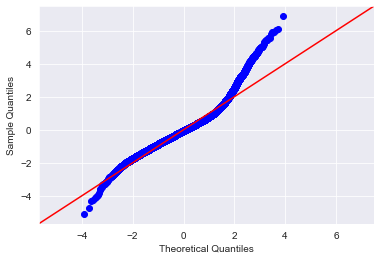

In [94]:
fig = sm.graphics.qqplot(model_2.resid, dist=stats.norm, line='45', fit=True)

## Model 3 - Categorical variables

In [95]:
df_no_outliers.condition.unique()

array([3, 5, 4, 1, 2])

In [96]:
df_no_outliers.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4])

In [105]:
df_no_outliers.view.unique()

array([0., 3., 2., 4., 1.])

In [97]:
grade_dummies = pd.get_dummies(df_no_outliers['grade'], prefix = 'grade_', drop_first= True)

In [99]:
view_dummies = pd.get_dummies(df_no_outliers['view'], prefix = 'view_' , drop_first= True)

In [100]:
grade_dummies.shape

(20753, 8)

In [101]:
view_dummies.shape

(20753, 4)

In [102]:
df_dummies = pd.concat([df_no_outliers, grade_dummies, view_dummies], axis =1 )

In [103]:
df_dummies.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

   view  condition  grade  ...  grade__7  grade__8  grade__9  grade__10  \
0   0.0          3      7  ...         1         0         0          0   
1   0.0          3      7  ...         1         0         0          0   
2   0.0          3      6  ...         0         0         0          0   
3   0.0          5      7  ...         1         0         0          0   
4   0.0          3      8  ...         0         1         0          0   

   grade__11  grade__12  view__1.0  view__2.0  view__3.0  view__4.0  
0          0          0          0          0          0          0  
1          0          0          0          0          0          0  
2          0          0          0          0          0          0  
3          0          0          0          0          0          0  
4          0          0          0          0          0          0  

[5 rows x 32 columns]

In [104]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20753 entries, 0 to 21595
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20753 non-null  int64  
 1   price          20753 non-null  float64
 2   bedrooms       20753 non-null  int64  
 3   bathrooms      20753 non-null  float64
 4   sqft_living    20753 non-null  int64  
 5   sqft_lot       20753 non-null  int64  
 6   floors         20753 non-null  float64
 7   view           20753 non-null  float64
 8   condition      20753 non-null  int64  
 9   grade          20753 non-null  int64  
 10  sqft_basement  20753 non-null  float64
 11  yr_built       20753 non-null  int64  
 12  yr_renovated   20753 non-null  float64
 13  zipcode        20753 non-null  int64  
 14  lat            20753 non-null  float64
 15  long           20753 non-null  float64
 16  sqft_living15  20753 non-null  int64  
 17  sqft_lot15     20753 non-null  int64  
 18  month 

In [106]:
df_dummies.drop(columns=['id', 'condition', 'view', 'grade', 'sqft_basement'], inplace = True)

In [107]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20753 entries, 0 to 21595
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20753 non-null  float64
 1   bedrooms       20753 non-null  int64  
 2   bathrooms      20753 non-null  float64
 3   sqft_living    20753 non-null  int64  
 4   sqft_lot       20753 non-null  int64  
 5   floors         20753 non-null  float64
 6   yr_built       20753 non-null  int64  
 7   yr_renovated   20753 non-null  float64
 8   zipcode        20753 non-null  int64  
 9   lat            20753 non-null  float64
 10  long           20753 non-null  float64
 11  sqft_living15  20753 non-null  int64  
 12  sqft_lot15     20753 non-null  int64  
 13  month          20753 non-null  int64  
 14  waterfront     20753 non-null  float64
 15  grade__5       20753 non-null  uint8  
 16  grade__6       20753 non-null  uint8  
 17  grade__7       20753 non-null  uint8  
 18  grade_

In [112]:
df_dummies.columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month', 'waterfront', 'grade__5', 'grade__6', 'grade__7',
       'grade__8', 'grade__9', 'grade__10', 'grade__11', 'grade__12',
       'view__1', 'view__2', 'view__3', 'view__4']

In [113]:
outcome = 'price'
predictors = df_dummies.drop(columns = ['price'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [114]:
model_3 = ols(formula = formula, data = df_dummies).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     1966.
Date:                Wed, 26 May 2021   Prob (F-statistic):               0.00
Time:                        15:06:49   Log-Likelihood:            -2.7432e+05
No. Observations:               20753   AIC:                         5.487e+05
Df Residuals:                   20726   BIC:                         5.489e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.103e+06   1.95e+06      0.566      0.572   -2.72e+06    4.92e+06
bedrooms      -9538.2643   1410.341     -6.763      0.000   -1.23e+04   -6773.886
bathrooms      3.496e+04   2232.357     15.660      0.000    3.06e+04    3.93e+04
sqft_living      81.4443      2.465     33.037      0.000      76.612      86.276
sqft_lot          0.1689      0.033      5.115      0.000       0.104       0.234
floors         2.688e+04   2202.106     12.204      0.000    2.26e+04    3.12e+04
yr_built      -2267.2345     47.351    -47.882      0.000   -2360.045   -2174.424
yr_renovated     13.6556      2.736      4.990      0.000       8.292      19.019
zipcode        -374.9637     22.305    -16.810      0.000    -418.684    -331.243
lat            5.679e+05   7167.321     79.240      0.000    5.54e+05    5.82e+05
long          -1.074e+05   8783.241    -12.229      0.000   -1.25e+05   -9.02e+04
sqft_living15    40.1024      2.431     16.494      0.000      35.337      44.868
sqft_lot15       -0.1543      0.050     -3.064      0.002      -0.253      -0.056
month         -2201.2407    297.226     -7.406      0.000   -2783.826   -1618.655
waterfront     1.309e+05   1.59e+04      8.209      0.000    9.96e+04    1.62e+05
grade__5       3.225e+04   3.68e+04      0.877      0.380   -3.98e+04    1.04e+05
grade__6       6.943e+04   3.58e+04      1.940      0.052    -713.862     1.4e+05
grade__7       1.285e+05   3.57e+04      3.596      0.000    5.85e+04    1.99e+05
grade__8       2.064e+05   3.58e+04      5.758      0.000    1.36e+05    2.77e+05
grade__9       3.258e+05    3.6e+04      9.045      0.000    2.55e+05    3.96e+05
grade__10      4.208e+05   3.63e+04     11.592      0.000     3.5e+05    4.92e+05
grade__11       5.09e+05   3.72e+04     13.677      0.000    4.36e+05    5.82e+05
grade__12      6.112e+05   4.63e+04     13.206      0.000     5.2e+05    7.02e+05
view__1        8.713e+04   7877.521     11.061      0.000    7.17e+04    1.03e+05
view__2        7.231e+04   4710.320     15.351      0.000    6.31e+04    8.15e+04
view__3        1.185e+05   6686.990     17.727      0.000    1.05e+05    1.32e+05
view__4        1.908e+05   1.07e+04     17.892      0.000     1.7e+05    2.12e+05
==============================================================================
Omnibus:                     3617.537   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11862.068
Skew:                           0.884   Prob(JB):                         0.00
Kurtosis:                       6.254   Cond. No.                     2.12e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This

In [115]:
X = df_dummies.drop("price", axis = 1)
y = df_dummies['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [116]:
print(len(X_train))

print(len(X_test))

15564
5189


In [117]:
model3_linreg = LinearRegression()
model3_linreg.fit(X_train, y_train)
y_pred = model3_linreg.predict(X_test)
residuals = y_pred - y_test

In [118]:
model3_linreg.coef_

array([-7.77980445e+03,  3.22881236e+04,  8.07346837e+01,  1.66979361e-01,
        2.64397650e+04, -2.28104038e+03,  1.70078489e+01, -4.01430368e+02,
        5.64905912e+05, -1.06805211e+05,  4.21873911e+01, -1.76530955e-01,
       -2.31274578e+03,  1.25619261e+05,  4.95812494e+04,  8.28650914e+04,
        1.42644898e+05,  2.21410695e+05,  3.37499837e+05,  4.41475501e+05,
        5.24094761e+05,  5.99228389e+05,  8.27447939e+04,  7.64941694e+04,
        1.18783140e+05,  2.05045108e+05])

In [119]:
mse_train = mean_squared_error(y_train, model3_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 132957.17389229182
Test RMSE: 133962.11230955465


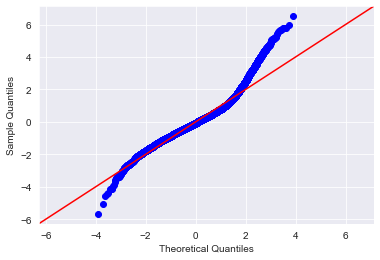

In [120]:
fig = sm.graphics.qqplot(model_3.resid, dist=stats.norm, line='45', fit=True)

## Model 4 - Transformations

In [121]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20753 entries, 0 to 21595
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20753 non-null  float64
 1   bedrooms       20753 non-null  int64  
 2   bathrooms      20753 non-null  float64
 3   sqft_living    20753 non-null  int64  
 4   sqft_lot       20753 non-null  int64  
 5   floors         20753 non-null  float64
 6   yr_built       20753 non-null  int64  
 7   yr_renovated   20753 non-null  float64
 8   zipcode        20753 non-null  int64  
 9   lat            20753 non-null  float64
 10  long           20753 non-null  float64
 11  sqft_living15  20753 non-null  int64  
 12  sqft_lot15     20753 non-null  int64  
 13  month          20753 non-null  int64  
 14  waterfront     20753 non-null  float64
 15  grade__5       20753 non-null  uint8  
 16  grade__6       20753 non-null  uint8  
 17  grade__7       20753 non-null  uint8  
 18  grade_

array([[<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>]], dtype=object)

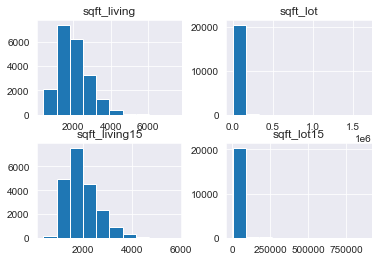

In [130]:
df_dummies[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']].hist()

In [127]:
df_dummies['log_sqft_living'] = np.log(df_dummies['sqft_living'])
df_dummies['log_sqft_lot'] = np.log(df_dummies['sqft_lot'])
df_dummies['log_sqft_living15'] = np.log(df_dummies['sqft_living15'])
df_dummies['log_sqft_lot15'] = np.log(df_dummies['sqft_lot15'])

array([[<AxesSubplot:title={'center':'log_sqft_living'}>,
        <AxesSubplot:title={'center':'log_sqft_lot'}>],
       [<AxesSubplot:title={'center':'log_sqft_living15'}>,
        <AxesSubplot:title={'center':'log_sqft_lot15'}>]], dtype=object)

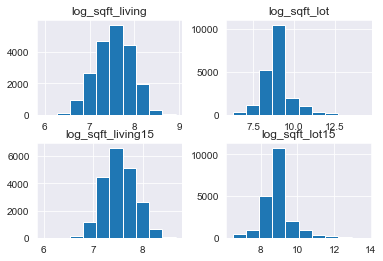

In [129]:
df_dummies[['log_sqft_living', 'log_sqft_lot', 'log_sqft_living15', 'log_sqft_lot15']].hist()

In [131]:
df_log = df_dummies.drop(columns = ['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'grade__5', 'grade__6'], axis = 1)

In [132]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20753 entries, 0 to 21595
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              20753 non-null  float64
 1   bedrooms           20753 non-null  int64  
 2   bathrooms          20753 non-null  float64
 3   floors             20753 non-null  float64
 4   yr_built           20753 non-null  int64  
 5   yr_renovated       20753 non-null  float64
 6   zipcode            20753 non-null  int64  
 7   lat                20753 non-null  float64
 8   long               20753 non-null  float64
 9   month              20753 non-null  int64  
 10  waterfront         20753 non-null  float64
 11  grade__7           20753 non-null  uint8  
 12  grade__8           20753 non-null  uint8  
 13  grade__9           20753 non-null  uint8  
 14  grade__10          20753 non-null  uint8  
 15  grade__11          20753 non-null  uint8  
 16  grade__12          207

In [133]:
outcome = 'price'
predictors = df_log.drop(columns = ['price'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [134]:
model_4 = ols(formula = formula, data = df_log).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     2096.
Date:                Wed, 26 May 2021   Prob (F-statistic):               0.00
Time:                        15:20:00   Log-Likelihood:            -2.7444e+05
No. Observations:               20753   AIC:                         5.489e+05
Df Residuals:                   20728   BIC:                         5.491e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.986e+06   2.01e+06      1.487      0.137   -9.51e+05    6.92e+06
bedrooms          -9742.9028   1438.271     -6.774      0.000   -1.26e+04   -6923.780
bathrooms          3.503e+04   2256.330     15.524      0.000    3.06e+04    3.94e+04
floors             1.783e+04   2347.574      7.596      0.000    1.32e+04    2.24e+04
yr_built          -2290.6014     47.709    -48.012      0.000   -2384.115   -2197.087
yr_renovated         14.7530      2.753      5.359      0.000       9.357      20.149
zipcode            -363.6357     22.454    -16.195      0.000    -407.647    -319.624
lat                5.612e+05   7253.099     77.375      0.000    5.47e+05    5.75e+05
long              -7.476e+04   9022.170     -8.286      0.000   -9.24e+04   -5.71e+04
month             -2146.3360    298.901     -7.181      0.000   -2732.205   -1560.467
waterfront          1.31e+05   1.61e+04      8.157      0.000    9.95e+04    1.62e+05
grade__7           4.169e+04   3587.472     11.622      0.000    3.47e+04    4.87e+04
grade__8           1.183e+05   4423.082     26.752      0.000     1.1e+05    1.27e+05
grade__9           2.554e+05   5578.843     45.789      0.000    2.45e+05    2.66e+05
grade__10          3.767e+05   6999.954     53.814      0.000    3.63e+05     3.9e+05
grade__11          5.041e+05   1.05e+04     48.064      0.000    4.84e+05    5.25e+05
grade__12          6.465e+05   2.94e+04     21.960      0.000    5.89e+05    7.04e+05
view__1            8.902e+04   7921.953     11.237      0.000    7.35e+04    1.05e+05
view__2            7.614e+04   4732.955     16.087      0.000    6.69e+04    8.54e+04
view__3            1.256e+05   6711.298     18.714      0.000    1.12e+05    1.39e+05
view__4            1.999e+05   1.07e+04     18.649      0.000    1.79e+05    2.21e+05
log_sqft_living    1.597e+05   5102.307     31.294      0.000     1.5e+05     1.7e+05
log_sqft_lot       3141.9404   2731.547      1.150      0.250   -2212.105    8495.986
log_sqft_living15  8.419e+04   4881.247     17.248      0.000    7.46e+04    9.38e+04
log_sqft_lot15    -1.844e+04   2972.873     -6.202      0.000   -2.43e+04   -1.26e+04
==============================================================================
Omnibus:                     3656.969   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11429.266
Skew:                           0.909   Prob(JB):                         0.00
Kurtosis:                       6.149   Cond. No.                     2.12e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinear

In [135]:
X = df_log.drop("price", axis = 1)
y = df_log['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [136]:
print(len(X_train))

print(len(X_test))

15564
5189


In [137]:
model4_linreg = LinearRegression()
model4_linreg.fit(X_train, y_train)
y_pred = model4_linreg.predict(X_test)
residuals = y_pred - y_test

In [138]:
model4_linreg.coef_

array([-7.87679043e+03,  3.17572663e+04,  1.64029430e+04, -2.30150500e+03,
        1.82085617e+01, -3.88669696e+02,  5.57113933e+05, -7.22003812e+04,
       -2.27270714e+03,  1.25708038e+05,  4.16226296e+04,  1.19123380e+05,
        2.53214274e+05,  3.83273545e+05,  5.07610619e+05,  6.12535162e+05,
        8.48127246e+04,  8.02579193e+04,  1.23610710e+05,  2.14012181e+05,
        1.59787044e+05,  2.99898522e+03,  8.88686917e+04, -2.03490130e+04])

In [139]:
mse_train = mean_squared_error(y_train, model4_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 133585.86245333467
Test RMSE: 135127.3177817911


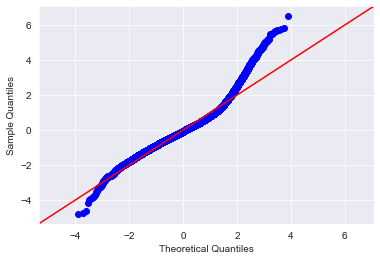

In [140]:
fig = sm.graphics.qqplot(model_4.resid, dist=stats.norm, line='45', fit=True)

In [145]:
df_no_outliers[df_no_outliers.grade > 10]

id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
5      7237550310  1230000.0         4       4.50         5420    101930   
70     1525059190  1040000.0         5       3.25         4770     50094   
270    4054500390  1370000.0         4       4.75         5310     57346   
314    4139480200  1400000.0         4       3.25         4290     12103   
384     713500030  1350000.0         5       3.50         4800     14984   
...           ...        ...       ...        ...          ...       ...   
21509  2625069038  1450000.0         4       3.50         4300    108865   
21516   324069112  1330000.0         4       4.00         4420     16526   
21532  8835770330  1060000.0         2       1.50         2370    184231   
21535  1561750040  1380000.0         5       4.50         4350     13405   
21574  7430200100  1220000.0         4       3.50         4910      9444   

       floors  view  condition  grade  sqft_basement  yr_built  yr_renovated  \
5         1.0   0.0          3     11         1530.0      2001           0.0   
70        1.0   0.0          4     11         1700.0      1973           0.0   
270       2.0   0.0          4     11            0.0      1989           0.0   
314       1.0   3.0          3     11         1600.0      1997           0.0   
384       2.0   2.0          3     11            0.0      1998           0.0   
...       ...   ...        ...    ...            ...       ...           ...   
21509     2.0   0.0          3     11            0.0      2014           0.0   
21516     2.0   0.0          3     11            0.0      2013           0.0   
21532     2.0   0.0          3     11            0.0      2005           0.0   
21535     2.0   0.0          3     11            0.0      2014           0.0   
21574     1.5   0.0          3     11         1800.0      2007           0.0   

       zipcode      lat     long  sqft_living15  sqft_lot15  month  waterfront  
5        98053  47.6561 -122.005           4760      101930      5         0.0  
70       98005  47.6525 -122.160           3530       38917      9         0.0  
270      98077  47.7285 -122.042           4180       47443     10         0.0  
314      98006  47.5503 -122.102           3860       11244     12         0.0  
384      98006  47.5543 -122.148           4050       19009      7         0.0  
...        ...      ...      ...            ...         ...    ...         ...  
21509    98074  47.6258 -122.005           4650      107498     11         0.0  
21516    98075  47.5914 -122.027           3510       50447      6         0.0  
21532    98045  47.4543 -121.778           3860      151081      8         0.0  
21535    98074  47.6018 -122.060           3990        7208     12         0.0  
21574    98074  47.6502 -122.066           4560       11063      5         0.0  

[273 rows x 20 columns]

## Model 5 - Dropping even more outliers

In [146]:
df_final = df_no_outliers[df_no_outliers.grade < 10]

In [147]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19524 entries, 0 to 21595
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19524 non-null  int64  
 1   price          19524 non-null  float64
 2   bedrooms       19524 non-null  int64  
 3   bathrooms      19524 non-null  float64
 4   sqft_living    19524 non-null  int64  
 5   sqft_lot       19524 non-null  int64  
 6   floors         19524 non-null  float64
 7   view           19524 non-null  float64
 8   condition      19524 non-null  int64  
 9   grade          19524 non-null  int64  
 10  sqft_basement  19524 non-null  float64
 11  yr_built       19524 non-null  int64  
 12  yr_renovated   19524 non-null  float64
 13  zipcode        19524 non-null  int64  
 14  lat            19524 non-null  float64
 15  long           19524 non-null  float64
 16  sqft_living15  19524 non-null  int64  
 17  sqft_lot15     19524 non-null  int64  
 18  month 

In [151]:
df_no_outliers[df_no_outliers.view > 2]

id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15     9297300055   650000.0         4       3.00         2950      5000   
58     7922800400   951000.0         5       3.25         3250     14342   
60     1516000055   650000.0         3       2.25         2150     21235   
218    1250202145  1070000.0         2       2.25         3900     14864   
230    8096000060   655000.0         2       1.75         1450     15798   
...           ...        ...       ...        ...          ...       ...   
21034  2424059170   900000.0         5       6.00         7120     40806   
21236  2309710130   272000.0         4       2.00         1870      6551   
21311  7394400080   535000.0         4       3.25         2840      4000   
21328  8835770170  1490000.0         5       6.00         6880    279968   
21523  8902000201   338500.0         3       2.25         1333      1470   

       floors  view  condition  grade  sqft_basement  yr_built  yr_renovated  \
15        2.0   3.0          3      9          970.0      1979           0.0   
58        2.0   4.0          4      8            0.0      1968           0.0   
60        1.0   3.0          4      8          560.0      1959           0.0   
218       1.0   3.0          3      8         1950.0      1947           0.0   
230       2.0   4.0          3      7          220.0      1915        1978.0   
...       ...   ...        ...    ...            ...       ...           ...   
21034     2.0   4.0          3     12         1640.0      2007           0.0   
21236     1.0   3.0          3      7            0.0      2009           0.0   
21311     2.0   3.0          3      9          510.0      2014           0.0   
21328     2.0   3.0          3     12         2810.0      2007           0.0   
21523     3.0   3.0          3      7            0.0      2009           0.0   

       zipcode      lat     long  sqft_living15  sqft_lot15  month  waterfront  
15       98126  47.5714 -122.375           2140        4000      1         0.0  
58       98008  47.5880 -122.116           2960       11044      8         0.0  
60       98166  47.4336 -122.339           2570       18900     12         0.0  
218      98144  47.5884 -122.291           2580        5184      8         0.0  
230      98166  47.4497 -122.375           2030       13193      4         1.0  
...        ...      ...      ...            ...         ...    ...         ...  
21034    98006  47.5451 -122.114           3440       36859      2         0.0  
21236    98022  47.1934 -121.977           2280        5331      7         0.0  
21311    98108  47.5529 -122.293           2160        4867      3         0.0  
21328    98045  47.4624 -121.779           4690      256803      8         0.0  
21523    98125  47.7058 -122.302           1360        1680      2         0.0  

[627 rows x 20 columns]

In [152]:
df_final = df_final[df_final.view <= 2]

In [153]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19010 entries, 0 to 21595
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19010 non-null  int64  
 1   price          19010 non-null  float64
 2   bedrooms       19010 non-null  int64  
 3   bathrooms      19010 non-null  float64
 4   sqft_living    19010 non-null  int64  
 5   sqft_lot       19010 non-null  int64  
 6   floors         19010 non-null  float64
 7   view           19010 non-null  float64
 8   condition      19010 non-null  int64  
 9   grade          19010 non-null  int64  
 10  sqft_basement  19010 non-null  float64
 11  yr_built       19010 non-null  int64  
 12  yr_renovated   19010 non-null  float64
 13  zipcode        19010 non-null  int64  
 14  lat            19010 non-null  float64
 15  long           19010 non-null  float64
 16  sqft_living15  19010 non-null  int64  
 17  sqft_lot15     19010 non-null  int64  
 18  month 

In [154]:
df_final.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  1.901000e+04  1.901000e+04  19010.000000  19010.000000  19010.000000   
mean   4.604295e+09  4.673966e+05      3.312941      2.018990   1913.053603   
std    2.872702e+09  2.107837e+05      0.865739      0.682096    707.121251   
min    1.000102e+06  7.800000e+04      1.000000      1.000000    390.000000   
25%    2.141013e+09  3.100000e+05      3.000000      1.500000   1380.000000   
50%    3.905080e+09  4.270000e+05      3.000000      2.000000   1820.000000   
75%    7.307925e+09  5.799500e+05      4.000000      2.500000   2350.000000   
max    9.900000e+09  1.500000e+06      7.000000      5.750000   6900.000000   

           sqft_lot        floors          view     condition         grade  \
count  1.901000e+04  19010.000000  19010.000000  19010.000000  19010.000000   
mean   1.327178e+04      1.462309      0.094582      3.421725      7.422830   
std    3.428537e+04      0.536737      0.407331      0.655188      0.877207   
min    5.200000e+02      1.000000      0.000000      1.000000      4.000000   
25%    5.000000e+03      1.000000      0.000000      3.000000      7.000000   
50%    7.350000e+03      1.000000      0.000000      3.000000      7.000000   
75%    9.972000e+03      2.000000      0.000000      4.000000      8.000000   
max    1.164794e+06      3.500000      2.000000      5.000000      9.000000   

       sqft_basement      yr_built  yr_renovated       zipcode           lat  \
count   19010.000000  19010.000000  19010.000000  19010.000000  19010.000000   
mean      258.029353   1969.967543     62.049711  98078.743030     47.557527   
std       397.138980     29.347995    346.422109     53.397375      0.141398   
min         0.000000   1900.000000      0.000000  98001.000000     47.155900   
25%         0.000000   1951.000000      0.000000  98033.000000     47.459725   
50%         0.000000   1972.000000      0.000000  98065.000000     47.568100   
75%       500.000000   1995.000000      0.000000  98118.000000     47.680300   
max      2720.000000   2015.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15         month    waterfront  
count  19010.000000   19010.000000   19010.000000  19010.000000  19010.000000  
mean    -122.217181    1868.252025   11564.445818      6.563125      0.001052  
std        0.140237     557.133655   23927.902594      3.123501      0.032420  
min     -122.519000     460.000000     651.000000      1.000000      0.000000  
25%     -122.331000    1460.000000    5000.000000      4.000000      0.000000  
50%     -122.241000    1770.000000    7440.000000      6.000000      0.000000  
75%     -122.132000    2210.000000    9620.000000      9.000000      0.000000  
max     -121.315000    4950.000000  438213.000000     12.000000      1.000000

In [155]:
outcome = 'price'
predictors = df_final.drop(columns = ['price'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [157]:
model_5 = ols(formula = formula, data = df_final).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     1847.
Date:                Wed, 26 May 2021   Prob (F-statistic):               0.00
Time:                        15:33:23   Log-Likelihood:            -2.5006e+05
No. Observations:               19010   AIC:                         5.002e+05
Df Residuals:                   18990   BIC:                         5.003e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.775e+06   1.94e+06     -1.947      0.052   -7.58e+06    2.51e+04
id            -1.831e-07    3.2e-07     -0.572      0.568   -8.11e-07    4.45e-07
bedrooms      -1.368e+04   1382.730     -9.892      0.000   -1.64e+04    -1.1e+04
bathrooms      2.566e+04   2259.555     11.357      0.000    2.12e+04    3.01e+04
sqft_living      85.4244      2.775     30.781      0.000      79.985      90.864
sqft_lot          0.1904      0.038      4.972      0.000       0.115       0.265
floors         3.598e+04   2416.923     14.887      0.000    3.12e+04    4.07e+04
view           3.746e+04   2313.767     16.192      0.000    3.29e+04     4.2e+04
condition      2.667e+04   1539.688     17.320      0.000    2.37e+04    2.97e+04
grade          7.893e+04   1599.811     49.337      0.000    7.58e+04    8.21e+04
sqft_basement    -0.2079      3.142     -0.066      0.947      -6.367       5.951
yr_built      -2103.3647     48.141    -43.691      0.000   -2197.726   -2009.003
yr_renovated     17.2844      2.750      6.284      0.000      11.893      22.676
zipcode        -293.7768     22.007    -13.349      0.000    -336.912    -250.641
lat             5.52e+05   6978.276     79.109      0.000    5.38e+05    5.66e+05
long          -8.148e+04   8731.613     -9.332      0.000   -9.86e+04   -6.44e+04
sqft_living15    53.1323      2.538     20.934      0.000      48.158      58.107
sqft_lot15       -0.1274      0.056     -2.296      0.022      -0.236      -0.019
month         -2510.7553    290.503     -8.643      0.000   -3080.167   -1941.344
waterfront     1.665e+04    2.8e+04      0.595      0.552   -3.82e+04    7.15e+04
==============================================================================
Omnibus:                     4333.189   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16608.487
Skew:                           1.098   Prob(JB):                         0.00
Kurtosis:                       7.018   Cond. No.                     1.16e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

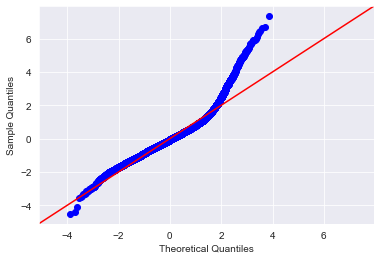

In [158]:
fig = sm.graphics.qqplot(model_5.resid, dist=stats.norm, line='45', fit=True)

In [159]:
X = df_final.drop("price", axis = 1)
y = df_final['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [160]:
print(len(X_train))

print(len(X_test))

14257
4753


In [161]:
model5_linreg = LinearRegression()
model5_linreg.fit(X_train, y_train)
y_pred = model5_linreg.predict(X_test)
residuals = y_pred - y_test

In [163]:
model5_linreg.coef_

array([-2.27031383e-07, -1.49024672e+04,  2.44981891e+04,  8.69702005e+01,
        1.90811749e-01,  3.74201182e+04,  3.80830583e+04,  2.66056267e+04,
        7.96498145e+04,  1.54729287e+00, -2.10392336e+03,  1.15343731e+01,
       -2.90871235e+02,  5.50171089e+05, -8.41876031e+04,  5.16404424e+01,
       -1.31516372e-01, -2.62966940e+03, -6.60044697e+03])

In [164]:
mse_train = mean_squared_error(y_train, model5_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 124801.20926230676
Test RMSE: 125302.42398843411
